Este é o Notebook oficial do grupo 4, aqui teremos:
- um resumo da análise de dados;
- os códigos responsáveis pelo processamento (tratamento) dos dados da tabela;
- o modelo preditivo;

Em todos os códigos, há comentários suficientes para explicar o objetivo e funcionamento da função.

# Importações e instalações

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import numpy as np

## Bibliotecas para os gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #geração de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objs as go

!pip install moment
import moment

py.init_notebook_mode(connected=True)

In [ ]:
# Conectando ao google drive
from google.colab import drive
drive.mount('/content/drive')
content_link = '/content/drive/Shareddrives/G444 Drive/docs everymind/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx'

In [ ]:
# Importando as planilhas
df1 = pd.read_excel(content_link)
df2 = pd.read_excel(content_link, sheet_name = 'Reconhecimento')
df3 = pd.read_excel(content_link, sheet_name = 'Ambiente de Trabalho 27.07')

# Análise de Dados - Resumo

# Tratamento de Dados

Resumo da seção:
- Modificação de dados 
- Categorização
- Derivação

## Modificação de dados
Aqui arrumamos a tipificação de dados (como datas em string para datetime)

In [ ]:
# Na coluna 'Genero', existem espaço incorreto após "Masculino"
df1['Genero'].replace(' ', '')

## Categorização
Aqui categorizamos os dados para numérico para tratar melhor com o modelo preditivo (como categorizar Tipo de Saída dos funcionários)

In [ ]:
# Categorização do gênero dos funcionários
df1['Genero Numerico'] = (df1['Genero']
                          .replace('Masculino ', 0)
                          .replace('Feminino', 1))

In [ ]:
# Categorização do tipo de saída dos funcionários
df1['Tipo Saida Numerico'] = (df1['Tipo Saida']
                              .fillna(0)
                              .replace('Rescisao Contrato Exp - Dispensa', 1)
                              .replace('Rescisao Contrato Exp - Pedido', 2)
                              .replace('Dispensa sem Justa Causa', 3)
                              .replace('Pedido de Demissão', 4))

In [ ]:
# Criação da tabela status, onde "0" é "desativo" e "1" é "ativo"
df1['Status Numerico'] = (df1['Tipo Saida Numerico']
                          .replace(0, 1)
                          .replace(1, 0)
                          .replace(2, 0)
                          .replace(3, 0)
                          .replace(4, 0))

In [ ]:
# Categorização dos Estados para futuros cruzamentos de dados
df1['Estado Numerico'] = (df1['Estado']
                       .replace('AC', 1)
                       .replace('AL', 2)
                       .replace('AP', 3)
                       .replace('AM', 4)
                       .replace('BA', 5)
                       .replace('CE', 6)
                       .replace('DF', 7)
                       .replace('ES', 8)
                       .replace('GO', 9)
                       .replace('MA', 10)
                       .replace('MT', 11)
                       .replace('MS', 12)
                       .replace('MG', 13)
                       .replace('PA', 14)
                       .replace('PB', 15)
                       .replace('PR', 16)
                       .replace('PE', 17)
                       .replace('PI', 18)
                       .replace('RJ', 19)
                       .replace('RN', 20)
                       .replace('RS', 21)
                       .replace('RO', 22)
                       .replace('RR', 23)
                       .replace('SC', 24)
                       .replace('SP', 25)
                       .replace('SE', 26)
                       .replace('TO', 27))

In [ ]:
# Categorização das Regiões (agrupando os Estados)
df1['Regiao Numerico'] = (df1['Estado Numerico']
                       # Norte
                       .replace(1, 1)
                       .replace(3, 1)
                       .replace(4, 1)
                       .replace(14, 1)
                       .replace(22, 1)
                       .replace(23, 1)
                       .replace(27, 1) 
                       # Nordeste
                       .replace(2, 2)
                       .replace(5, 2)
                       .replace(6, 2)
                       .replace(10, 2)
                       .replace(15, 2)
                       .replace(17, 2)
                       .replace(18, 2)
                       .replace(20, 2)
                       .replace(26, 2) 
                       # Centro
                       .replace(7, 3)
                       .replace(9, 3)
                       .replace(11, 3)
                       .replace(12, 3)
                       # Sudeste
                       .replace(8, 4)
                       .replace(13, 4)
                       .replace(19, 4)
                       .replace(25, 4)
                       # Sul
                       .replace(16, 5)
                       .replace(21, 5)
                       .replace(24, 5)
                       )

## Derivação
Aqui criamos algumas variáveis a mais a partir dos dados que temos para melhorar o modelo preditivo (como criar a idade a partir da data de nascimento)

### Jornada de trabalho

In [ ]:
#Função pega a data de admissão do colaborador e a data do seu desligamento, e encontra o perído entre elas.
df1['Tempo de Trabalho'] = (pd.to_datetime(df1['Dt Saida']) - pd.to_datetime(df1['Dt Admissao'])).dropna()

### Idade

In [ ]:
#Ele pega a data de hoje e subtrai da data de nascimento, retornando a idade, np.timedelta64, transforma o retorno da data de dias para ano.
df1['Idade'] = ((pd.to_datetime('today')-pd.to_datetime(df1['Dt Nascimento']))/ np.timedelta64(1, 'Y')).astype(int)

## Seleção de dados

### Quantidades de reconhecimento

Em ordem: 
- Pessoas que saíram
- Pessoas que não saíram
- Pessoas que foram reconhecidas de alguma forma
- Pessoas que não foram reconhecidas
- Pessoas que saíram e foram reconhecidas
- Pessoas que saíram e não foram reconhecidas 

In [ ]:
# Pessoas que saíram: ✔
pessoas_desativadas = df1.dropna(subset=['Dt Saida'])['Nome Completo'].unique()
qtd_desativados = len(pessoas_desativadas)
qtd_desativados

189

In [ ]:
# Pessoas que não saíram: ✔
pessoas_ativas = df1.query('`Dt Saida` == ""')['Nome Completo'].unique()
len(pessoas_ativas)

284

In [ ]:
# Pessoas que foram reconhecidas de alguma forma: ✔
pessoas_reconhecidas = df2['Codinome'].unique()
len(pessoas_reconhecidas)

173

In [ ]:
# Pessoas que não foram reconhecidas: ✔
lista_pessoas = df1['Nome Completo'].unique()
pessoas_sem_reconhecimento = []
for i in range(0, len(lista_pessoas)):
  if lista_pessoas[i] in pessoas_reconhecidas:
    continue
  else:
    pessoas_sem_reconhecimento.append(lista_pessoas[i])
len(pessoas_sem_reconhecimento)

298

In [ ]:
  # Pessoas que foram reconhecidas e saíram ✔
pessoas_desativadas_reconhecidas = df2.query('`Situação` == "Desligado"')['Codinome'].unique()
len(pessoas_desativadas_reconhecidas)

62

In [ ]:
# Pessoas que não foram reconhecidas e saíram:
pessoas_desativadas_sem_reconhecimento = []
for pessoa in pessoas_desativadas:
  if pessoa in pessoas_reconhecidas:
    continue
  else:
    pessoas_desativadas_sem_reconhecimento.append(pessoa)
print(len(pessoas_desativadas_sem_reconhecimento))

127


### Gênero

In [ ]:
gen_total = df1.groupby(['Genero Numerico']).count()
gen_total

,Matrícula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area,Tipo Saida Numerico,Tempo de Trabalho,Idade
Genero Numerico,,,,,,,,,,,,,,,,,,
0,363,363,363,156,156,363,363,363,363,363,363,363,363,363,363,156,156,363
1,112,112,112,35,35,112,112,112,112,112,112,112,112,112,112,35,35,112


In [ ]:
gen_total_masc = gen_total.iloc[0, 1]
gen_total_masc

363

In [ ]:
gen_total_fem = gen_total.iloc[1, 1]
gen_total_fem

112

In [ ]:
gen_masc_left = gen_total.iloc[0, 3]
gen_masc_left

156

In [ ]:
gen_fem_left = gen_total.iloc[1, 3]
gen_fem_left

35

In [ ]:
gen_fem_prop = (gen_fem_left/gen_total_fem)*100
gen_fem_prop

31.25

In [ ]:
gen_masc_prop = (gen_masc_left/gen_total_masc)*100
gen_masc_prop

42.97520661157025

# Gráficos

### Porcentagem de saídas em gênero 

Text(0.5, 1.0, 'Desligamentos x Gênero (proporcionalmente)')

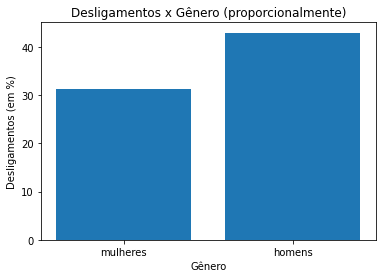

In [ ]:
gen_x = ['mulheres', 'homens']
gen_y = [gen_fem_prop, gen_masc_prop]

plt.bar(gen_x, gen_y)

plt.xlabel('Gênero')
plt.ylabel('Desligamentos (em %)')
plt.title('Desligamentos x Gênero (proporcionalmente)')

# Testes

In [ ]:
df1

,Matrícula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area,Genero Numerico,Tipo Saida Numerico,Tempo de Trabalho,Idade
0,20.0,Pessoa Colaboradora 287,2009-04-01 00:00:00,2021-10-29,Pedido de Demissão,Dev Especialista,4406.965,1981-06-16,Masculino,Branca,Solteiro,Graduação,SP,Santos,AMS,0,Pedido de Demissão,4594 days,41
1,90.0,Pessoa Colaboradora 336,2015-05-04 00:00:00,2022-05-20,Pedido de Demissão,Dev Sr,4660.530,1993-06-10,Masculino,Não Informada,Solteiro,Graduação,SP,São Paulo,Analytics,0,Pedido de Demissão,2573 days,29
2,7.0,Pessoa Colaboradora 291,2015-09-01 00:00:00,2021-10-29,Pedido de Demissão,Arquiteto,7000.000,1986-08-31,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,Core & Industrias II,0,Pedido de Demissão,2250 days,35
3,91.0,Pessoa Colaboradora 391,2015-09-21 00:00:00,2022-05-03,Pedido de Demissão,Arquiteto,7772.155,1985-10-25,Masculino,Não Informada,Casado,Graduação,SP,Santa Bárbara D'Oeste,Analytics,0,Pedido de Demissão,2416 days,36
4,8.0,Pessoa Colaboradora 412,2015-12-07 00:00:00,2020-05-29,Pedido de Demissão,Dev Pl,2750.000,1994-06-27,Masculino,Parda,Solteiro,Graduação,SP,São Paulo,CPG & Retail I,0,Pedido de Demissão,1635 days,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,441.0,Pessoa Colaboradora 168,23/12/2020,NaT,NaN,Dev Jr,1716.480,1999-01-11,Masculino,Branca,Solteiro,Superior incompleto,RS,Pelotas,Commerce,0,NaN,NaT,23
471,447.0,Pessoa Colaboradora 274,23/12/2020,NaT,NaN,Dev Jr,1716.480,1985-12-19,Masculino,Branca,Solteiro,Superior incompleto,RS,Pelotas,Commerce,0,NaN,NaT,36
472,460.0,Pessoa Colaboradora 267,23/12/2020,NaT,NaN,Dev Jr,1716.480,1991-12-15,Masculino,Branca,Solteiro,Superior incompleto,SC,São José,Commerce,0,NaN,NaT,30
473,3.0,Pessoa Colaboradora 92,26/03/2015,NaT,NaN,Gerente Sr,8250.000,1991-08-03,Masculino,Branca,Solteiro,Graduação,SP,Osasco,CPG & Retail I,0,NaN,NaT,31


In [ ]:
df1.Idade.value_counts()

31    29
24    27
23    27
30    26
27    26
32    25
22    24
26    24
25    23
28    23
21    22
29    19
35    18
33    17
34    16
36    15
19    12
39    11
20    11
40    10
37    10
41     9
38     8
42     6
48     4
44     4
43     4
51     4
45     3
55     3
46     2
52     2
49     2
18     2
61     1
57     1
50     1
54     1
65     1
53     1
64     1
Name: Idade, dtype: int64